<a href="https://colab.research.google.com/github/jolex007/COS_DL/blob/master/2_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Второе домашнее задание



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Описание нейросети

In [2]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ###
    n_x = 2
    n_h = 4
    n_y = 1
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

## Инициализация параметров

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # ЭТУ_СТРОКУ_НЕ_РЕДАКТИРОВАТЬ
    
    ### START CODE HERE ###
    W1 = np.random.randn(n_h, n_x)
    b1 = np.ones((n_h, 1)) * (1.)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.ones((n_y, 1)) * (1.)
    ### END CODE HERE ###
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Forward propogation

In [4]:
def forward_propagation(X, parameters, activation_func):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    activation_func -- function of activation
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    ### START CODE HERE ###
    #print("b1 shape is", b1.shape, "W1 shape is", W1.shape, "X shape is", X.shape)
    Z1 = W1 @ X + b1
    A1 = activation_func(Z1)
    Z2 = W2 @ A1 + b2
    A2 = activation_func(Z2)
    ### END CODE HERE ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Backward propagation

In [5]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (formula 4)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    
    ### START CODE HERE ###
    
    #logprobs = None
    cost = -1./m * np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2))).sum()
    
    ### END CODE HERE ###
    
    return cost

In [6]:
def backward_propagation(parameters, cache, X, Y, diff_activation_func):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    diff_activation_func -- diff of activation function
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    ### START CODE HERE ###
    dZ2 = A2 - Y
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * dZ2.sum()
    dZ1 = np.dot(W2.T, dZ2) * diff_activation_func(Z1)
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

## Обновление параметров

In [7]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
   
    ### START CODE HERE ###
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h, activation_func, diff_activation_func, num_iterations=10000, learning_rate=1.2, print_cost=False, cost_iter=100):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    func -- function of activation
    diff_func -- diff of activation function
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Инициализируйте параметры. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    
    ### START CODE HERE ###
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs = []
    
    # Loop (градиентный спуск)

    for i in range(0, num_iterations):
        
        ### START CODE HERE ###
        # Шаг forward propagation
        A2, cache = forward_propagation(X, parameters, activation_func)
        
        # Подсчет функции потерь
        cost = compute_cost(A2, Y, parameters)
 
        # Шаг backpropagation
        grads = backward_propagation(parameters, cache, X, Y, diff_activation_func)

        # Обновление весов
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
        if i % cost_iter == 0:
            costs.append(cost)

    return {'params' : parameters,
            'costs' : costs}

## Вывод предсказания


In [9]:
def predict(parameters, X, activation_func, threshold = 0.5):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    threshold -- used for defining prediction
    activation_func -- activation function
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters, activation_func)
    predictions = (A2>threshold).astype(int)
    ### END CODE HERE ###
    
    return predictions

## Загрузка датасета

In [10]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(14,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    
    #plt.figure(figsize=(14,8))
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    #plt.show()

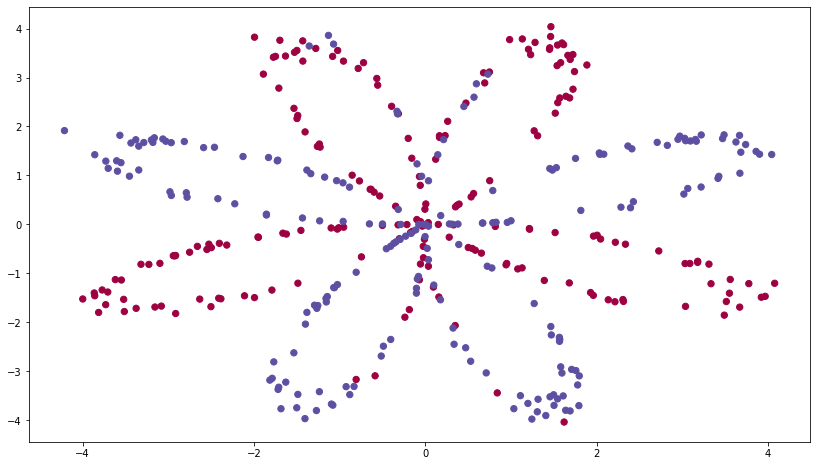

In [12]:
X, Y = load_planar_dataset() #загружаем датасет
plt.figure(figsize=(14,8))
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

## Дополнительные функции

In [13]:
def sigmoid(x):
    return 1. / (np.exp(-x) + 1)

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [14]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_diff(x):
    return 4. / ((np.exp(x) + np.exp(-x)) ** 2)

In [15]:
def ReLU(x):
    return np.where(x > 0, x, 0)

def ReLU_diff(x):
    return np.where(x > 0, 1, 0)

In [16]:
def LeakyReLU(x, alpha=0.5):
    return np.where(x > 0, x, x * 0.2)

def LeakyReLU_diff(x, alpha=0.5):
    return np.where(x > 0, 1, 0.2)

## Обучение и предсказание

## Вывод графиков

In [17]:
import pylab

In [18]:
# Частота вывода cost
costs_iter = 10

In [19]:
def normalize_params(params):
    for i, elem in enumerate(params):
        if i == 0 and elem >= 3.2:
            elem = 3.2
        elif elem >= 3.2:
            elem = params[i - 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


Cost after iteration 0: 1.242604
Cost after iteration 1000: 0.327999
Cost after iteration 2000: 0.321859
Cost after iteration 3000: 0.317305
Cost after iteration 4000: 0.311699
Cost after iteration 5000: 0.296711
Cost after iteration 6000: 0.291190
Cost after iteration 7000: 0.287334
Cost after iteration 8000: 0.284330
Cost after iteration 9000: 0.281917
param len 1
Cost after iteration 0: 0.922869
Cost after iteration 1000: 0.316966
Cost after iteration 2000: 0.302021
Cost after iteration 3000: 0.294712
Cost after iteration 4000: 0.289833
Cost after iteration 5000: 0.286090
Cost after iteration 6000: 0.282983
Cost after iteration 7000: 0.280243
Cost after iteration 8000: 0.277589
Cost after iteration 9000: 0.274882
param len 1
Cost after iteration 0: inf
Cost after iteration 1000: 0.651036


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Cost after iteration 2000: 0.649590
Cost after iteration 3000: 0.649337
Cost after iteration 4000: 0.649266
Cost after iteration 5000: 0.649190
Cost after iteration 6000: 0.649152
Cost after iteration 7000: 0.649122
Cost after iteration 8000: 0.649101
Cost after iteration 9000: 0.649065
param len 1
Cost after iteration 0: 0.035064
Cost after iteration 1000: -0.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Cost after iteration 2000: -0.000000
Cost after iteration 3000: -0.000000
Cost after iteration 4000: -0.000000
Cost after iteration 5000: -0.000000
Cost after iteration 6000: -0.000000
Cost after iteration 7000: -0.000000
Cost after iteration 8000: -0.000000
Cost after iteration 9000: -0.000000
param len 1
Cost after iteration 0: 1.244377
Cost after iteration 1000: 0.336057
Cost after iteration 2000: 0.312227
Cost after iteration 3000: 0.286707
Cost after iteration 4000: 0.272222
Cost after iteration 5000: 0.261561
Cost after iteration 6000: 0.248595
Cost after iteration 7000: 0.228847
Cost after iteration 8000: 0.203850
Cost after iteration 9000: 0.209229
param len 2
Cost after iteration 0: 0.885385
Cost after iteration 1000: 0.315260
Cost after iteration 2000: 0.297491
Cost after iteration 3000: 0.286187
Cost after iteration 4000: 0.277038
Cost after iteration 5000: 0.269013
Cost after iteration 6000: 0.263004
Cost after iteration 7000: 0.258376
Cost after iteration 8000: 0.254692
Co

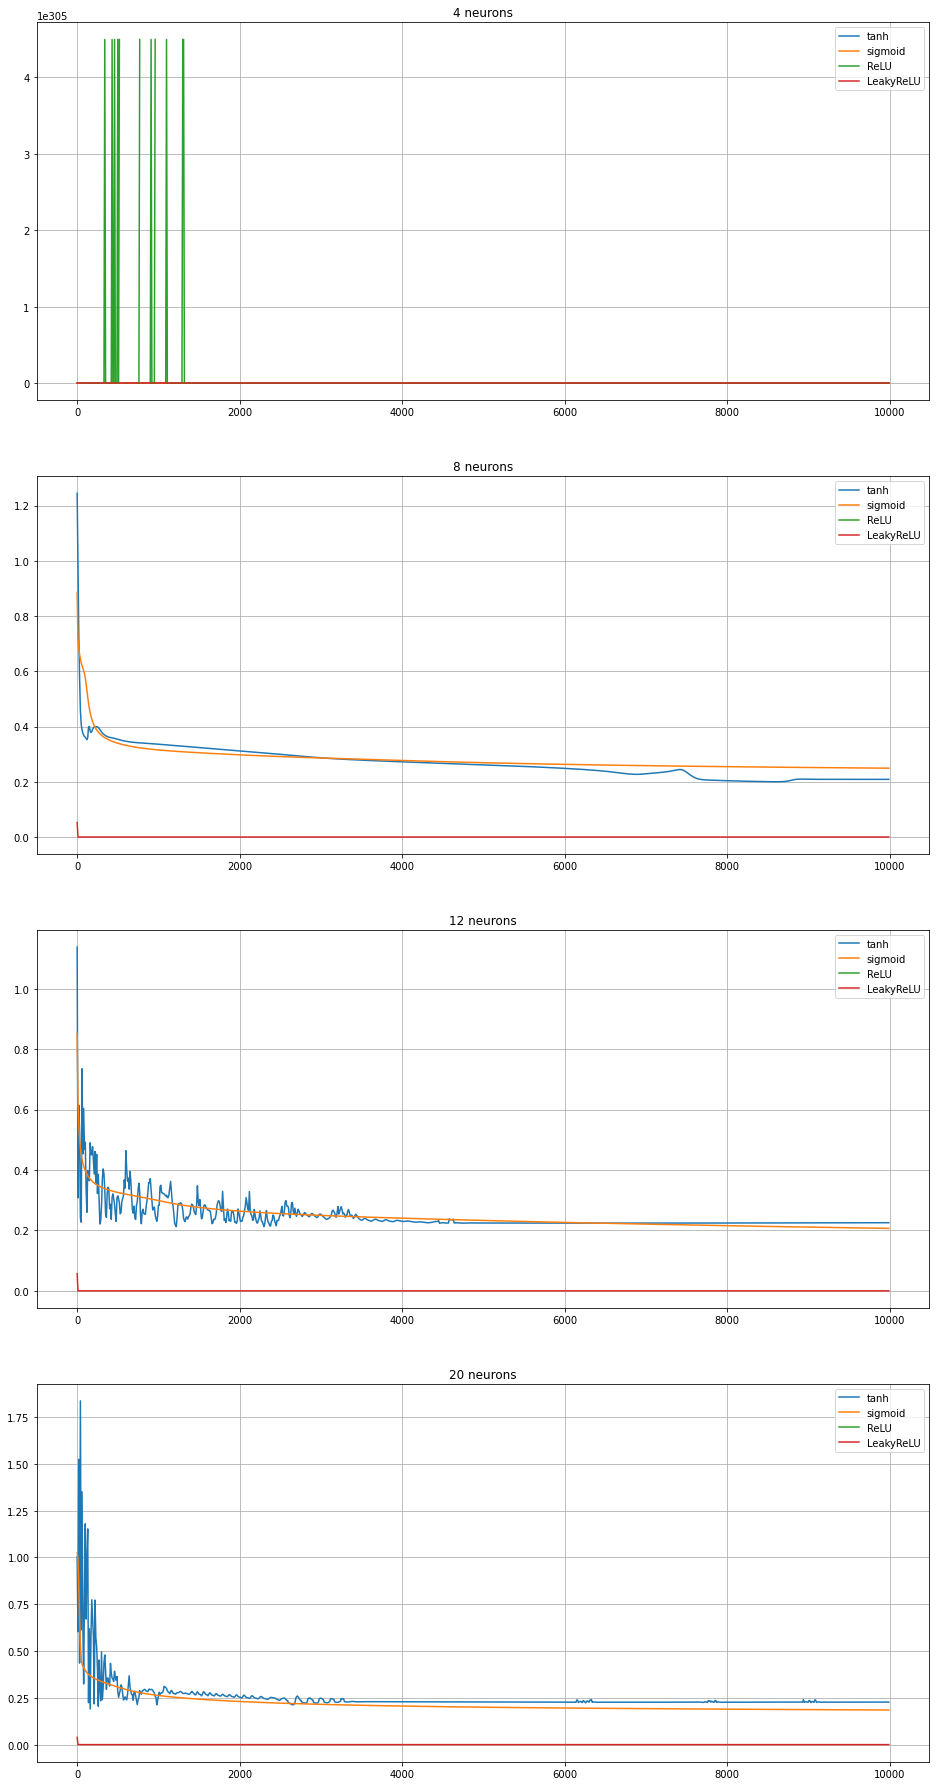

In [23]:
fig = plt.figure(figsize=(16, 32))

neurons = [4, 8, 12, 20]

tanh_par = []
sigmoid_par = []
ReLU_par = []
LeakyReLU_par = []

activ_functions = [tanh, sigmoid, ReLU, LeakyReLU]
activ_functions_diff = [tanh_diff, sigmoid_diff, ReLU_diff, LeakyReLU_diff]
functions_par = [tanh_par, sigmoid_par, ReLU_par, LeakyReLU_par]
values = ['tanh', 'sigmoid', 'ReLU', 'LeakyReLU']

for pos, neuro in enumerate(neurons):
    plt.subplot(4, 1, pos + 1)

    for func, func_diff, param in zip(activ_functions, activ_functions_diff, functions_par):
        param.append(nn_model(X, Y, neuro, func, func_diff,
                             num_iterations=10000,
                             learning_rate=1.2,
                             print_cost=True,
                             cost_iter=costs_iter))
        
        normalize_params(param[-1]['costs'])

        print('param len', len(param))
        plt.plot(list(range(0, len(param[-1]['costs']) * costs_iter, costs_iter)), param[-1]['costs'])

    plt.grid(True)
    plt.legend(values, loc='upper right')
    plt.title(f'{neuro} neurons')

plt.show()



In [ ]:
# Отрисуем вывод нейросети на плоскости
plot_decision_boundary(lambda x: predict(parameters_LeakyReLU, x.T, LeakyReLU), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))